In [1]:
from keras.models import Sequential, Model
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, UpSampling2D, Reshape, Input, MaxPooling2D
from keras.layers import Conv2D, MaxPool2D
from keras import regularizers, optimizers
from keras.optimizers import RMSprop
import pandas as pd
import numpy as np
import os
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.utils.np_utils import to_categorical
import cv2
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.optimizers import SGD
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

C:\Users\lskel\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder),key=lambda x: int(os.path.splitext(x)[0])):
        img = cv2.imread(os.path.join(folder,filename))
        newimg = cv2.resize(img, (28,28))
        if img is not None:
            images.append(newimg)
    return images



In [3]:
sorted(os.listdir('train_images/train_images'),key=lambda x: int(os.path.splitext(x)[0]))

['0.jpg',
 '1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg'

In [4]:
X = np.array(load_images_from_folder('train_images/train_images'))
X = X.astype('float32') / 255.

In [5]:
df = pd.read_csv("train_images.csv", dtype = 'str')

In [6]:
df.head()

,id,label
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [7]:
X = np.array(load_images_from_folder("train_images/train_images"))

In [8]:
y = df['label'].values
y.shape

(6427,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5141, 28, 28, 3), (5141, 2), (1286, 28, 28, 3), (1286, 2))

In [10]:
class_weight = {0: 1,1: 50}

In [11]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 3)))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,
          epochs=100,
          verbose=1,
          class_weight=class_weight,
          validation_data=(X_test, y_test))

Epoch 1/100
161/161 [==============================] - 5s 32ms/step - loss: 8.9683 - accuracy: 0.9695 - val_loss: 0.0677 - val_accuracy: 0.9930
Epoch 2/100
161/161 [==============================] - 5s 31ms/step - loss: 0.1376 - accuracy: 0.9936 - val_loss: 0.0404 - val_accuracy: 0.9961
Epoch 3/100
161/161 [==============================] - 5s 31ms/step - loss: 0.1604 - accuracy: 0.9946 - val_loss: 0.0439 - val_accuracy: 0.9938
Epoch 4/100
161/161 [==============================] - 5s 31ms/step - loss: 0.2421 - accuracy: 0.9897 - val_loss: 0.0862 - val_accuracy: 0.9914
Epoch 5/100
161/161 [==============================] - 5s 31ms/step - loss: 0.2529 - accuracy: 0.9907 - val_loss: 0.1218 - val_accuracy: 0.9852
Epoch 6/100
161/161 [==============================] - 5s 31ms/step - loss: 0.0349 - accuracy: 0.9965 - val_loss: 0.0174 - val_accuracy: 0.9977
Epoch 7/100
161/161 [==============================] - 5s 31ms/step - loss: 0.0554 - accuracy: 0.9967 - val_loss: 0.0357 - val_accuracy:

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [14]:
test = np.array(load_images_from_folder("test_images"))

In [15]:
prediction = np.argmax(model.predict(test), axis=-1)

In [16]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
score4 = model.evaluate(X_test, y_test)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

41/41 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.9969
Test loss: 0.01933300495147705
Test accuracy: 0.996889591217041


In [18]:
sample = pd.read_csv('sample_submission.csv')
newsample = sample.drop("target", axis = 1)

In [19]:
newsample

,id
0,0
1,1
2,2
3,3
4,4
...,...
1065,1065
1066,1066
1067,1067
1068,1068


In [20]:
newsample['target'] = prediction
newsample.to_csv('newsample.csv', header=True, index=False)

In [21]:
newsample

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1065,1065,0
1066,1066,0
1067,1067,0
1068,1068,0


In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

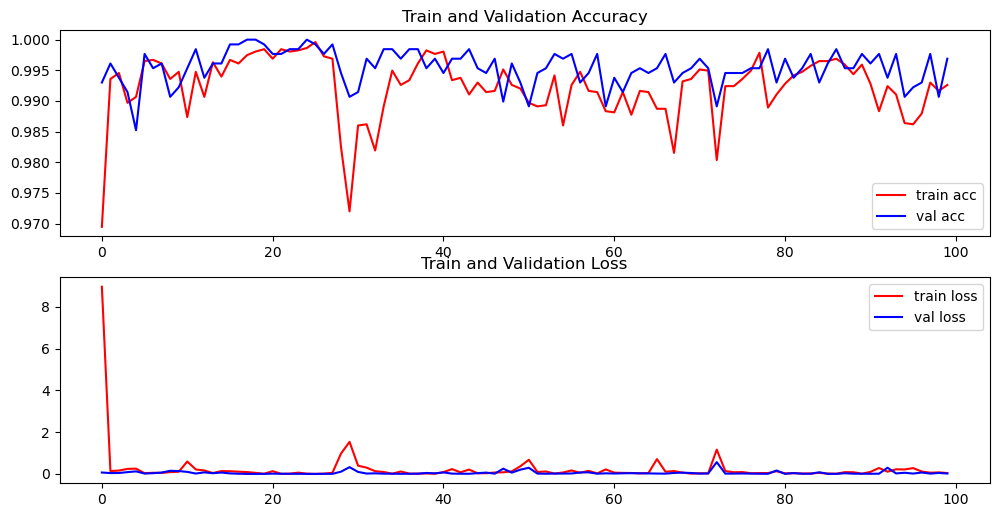

In [24]:
epoch_number = range(len(acc))
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6), dpi=100)
plt.subplot(2,1,1)
plt.plot(epoch_number, acc, 'r', label='train acc')
plt.plot(epoch_number, val_acc, 'b', label='val acc')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(epoch_number, loss, 'r', label='train loss')
plt.plot(epoch_number, val_loss, 'b', label='val loss')
plt.title('Train and Validation Loss')
plt.legend()

plt.show()

In [25]:
preds = model.predict(X_test)

In [26]:
cnn_probs = preds[:, 1]

In [27]:
cnn_precision, cnn_recall, _ = precision_recall_curve(y_test.argmax(axis=1), cnn_probs)

In [28]:
cnn_precision

array([0.875     , 0.87412587, 0.88028169, 0.88652482, 0.89285714,
       0.89928058, 0.9057971 , 0.91240876, 0.91911765, 0.92592593,
       0.93283582, 0.93984962, 0.9469697 , 0.95419847, 0.96153846,
       0.96899225, 0.9765625 , 0.98425197, 0.98412698, 1.        ,
       1.        , 1.        , 1.        ])

In [29]:
cnn_recall

array([1.        , 0.99206349, 0.99206349, 0.99206349, 0.99206349,
       0.99206349, 0.99206349, 0.99206349, 0.99206349, 0.99206349,
       0.99206349, 0.99206349, 0.99206349, 0.99206349, 0.99206349,
       0.99206349, 0.99206349, 0.99206349, 0.98412698, 0.98412698,
       0.97619048, 0.96825397, 0.        ])

In [30]:
cnn_auc = auc(cnn_recall, cnn_precision)

In [31]:
cnn_auc

0.998878987407765

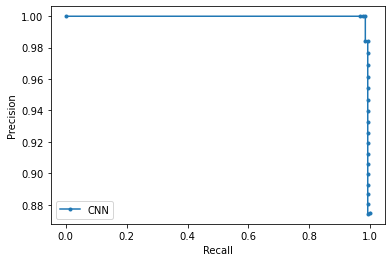

In [32]:
plt.plot(cnn_recall, cnn_precision, marker='.', label='CNN')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()